#Getting started with the data
First load the data and see what features are within the dataset. Since there are two seperate csv files we have to merge them into one dataframe. There are 16 columns and 2226 rows. Most of them seem to be non-null with only some rows missing information about latitude, longitude and streetaddress.

In [1]:
import pandas as pd
data_2015 = pd.read_csv("data/2015.csv",encoding='latin-1')
data_2016 = pd.read_csv("data/2016.csv",encoding='latin-1')
data = pd.concat([data_2015, data_2016])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 1079
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uid                   2226 non-null   int64  
 1   name                  2226 non-null   object 
 2   age                   2226 non-null   object 
 3   gender                2226 non-null   object 
 4   raceethnicity         2226 non-null   object 
 5   armed                 2226 non-null   object 
 6   month                 2226 non-null   object 
 7   day                   2226 non-null   int64  
 8   year                  2226 non-null   int64  
 9   streetaddress         2194 non-null   object 
 10  city                  2226 non-null   object 
 11  state                 2226 non-null   object 
 12  latitude              2156 non-null   float64
 13  longitude             2156 non-null   float64
 14  classification        2226 non-null   object 
 15  lawenforcementagency 

Loading the first 5 rows shows us what the data looks like.

In [2]:
data.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,Death in custody,Chatham County Sheriff's Office
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,Gunshot,Washington County Sheriff's Office
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle,Kauai Police Department
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,Gunshot,Wichita Police Department
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,Gunshot,Mason County Sheriff's Office


#Making some graphs
Let's first make a graph that show how people die, depending on what type of weapon they were carrying

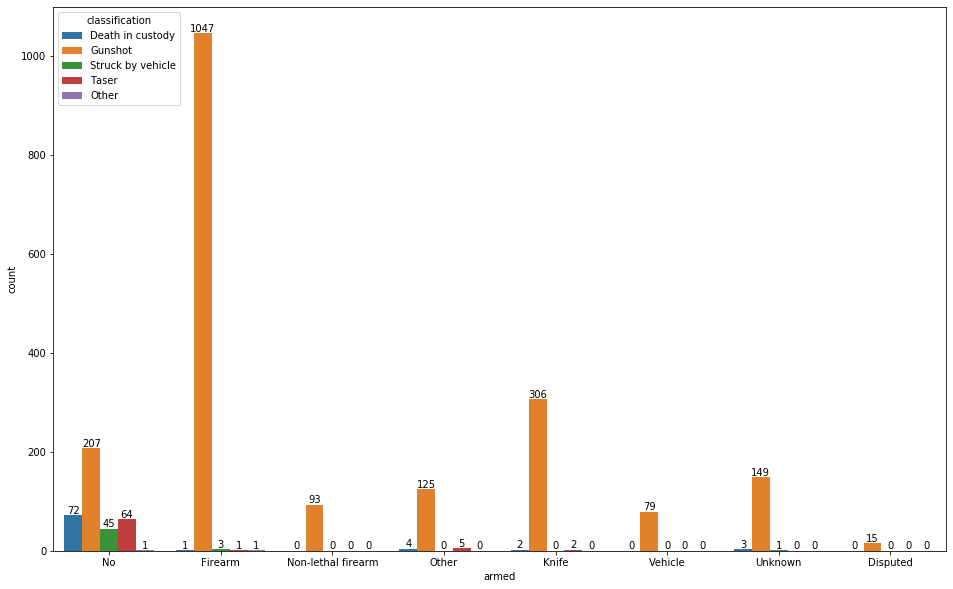

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

ax = sns.countplot(x="armed", hue="classification", data=data)
for p in ax.patches:
    height = p.get_height()
    label = ""
    if str(height) == "nan":
        height = 0
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            int(height),
            ha="center") 
plt.show()

As you can see most people get killed by gunshot. Interestingly, when the suspect isn't armed, there is the most variety in ways the suspect dies.

What about a graph that shows in which months most people get killed?

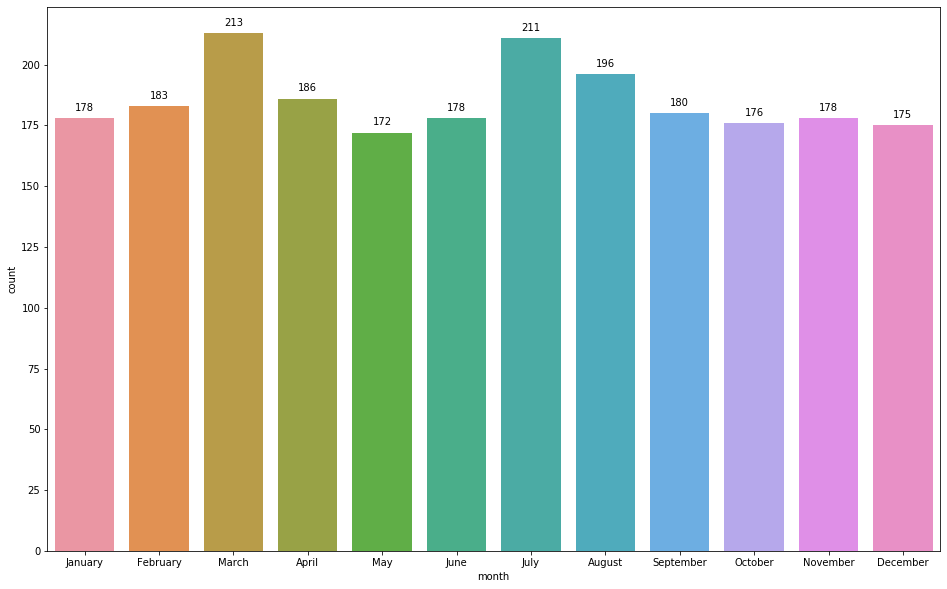

In [4]:
plt.figure(figsize=(16, 10))

ax = sns.countplot(x="month", data=data)
for p in ax.patches:
    height = p.get_height()
    label = ""
    if str(height) == "nan":
        height = 0
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            int(height),
            ha="center") 
plt.show()

Looks like everything is quite evenly distributed with some increased acitvity during March, July and August. A slight decrease can be seen during May.

#Visualising where people got killed

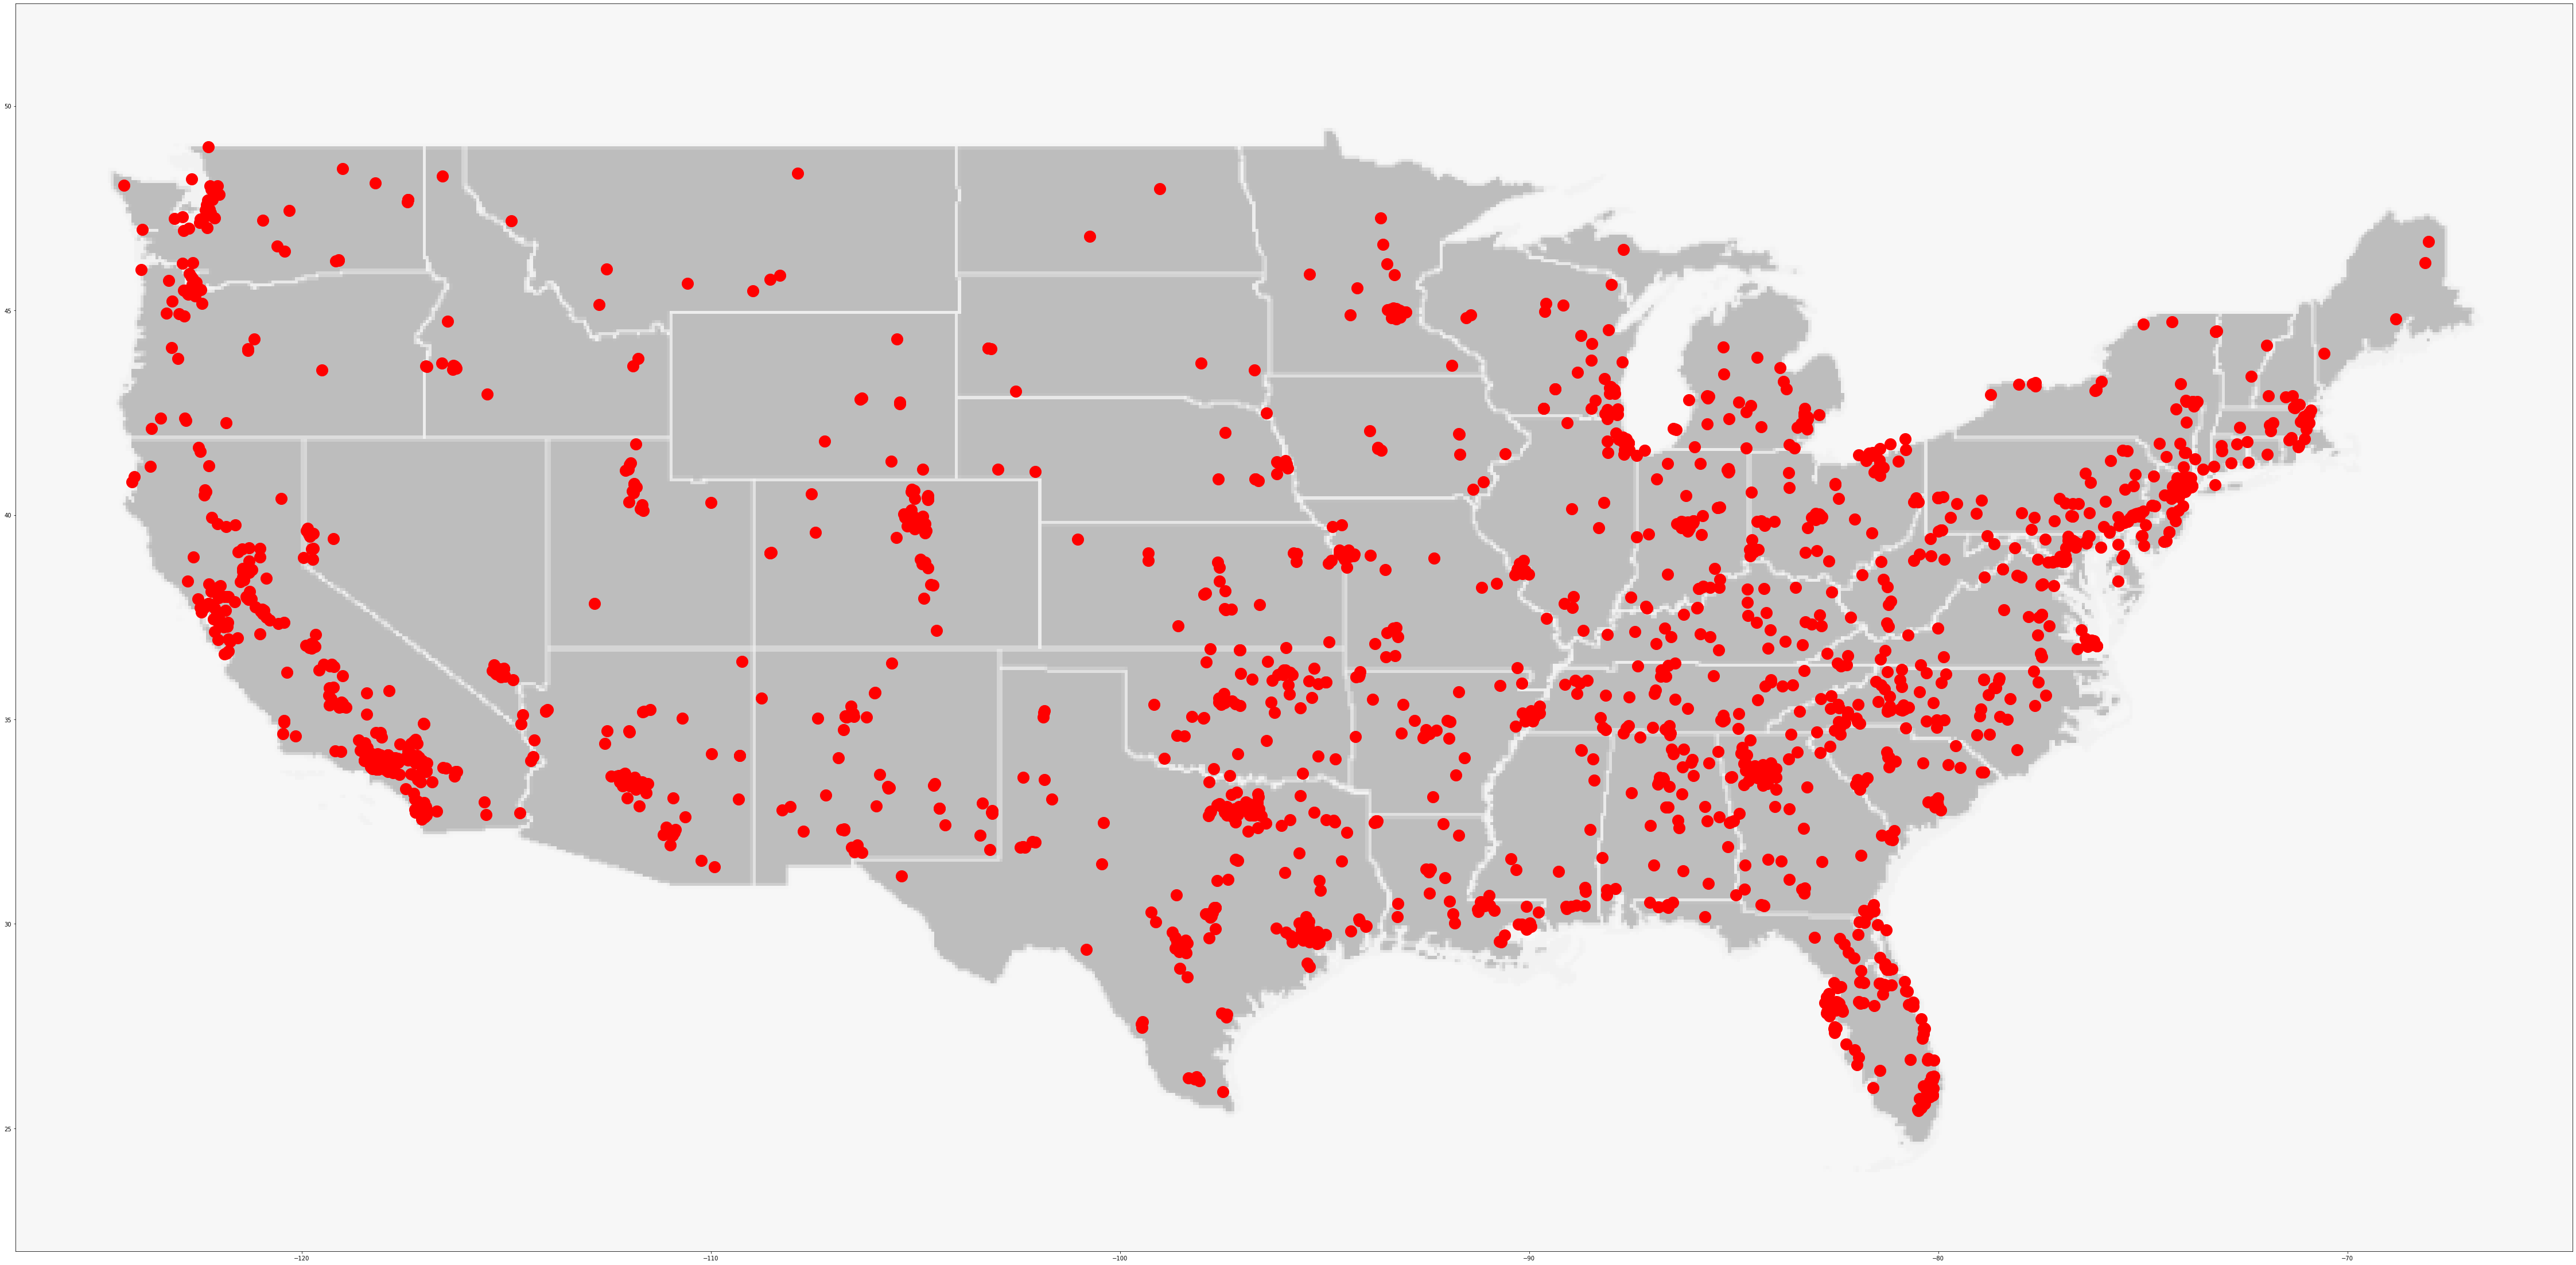

In [54]:
img = plt.imread("usa2.png")
filtered = data[["longitude","latitude"]]
filtered = filtered[filtered["longitude"] > -130]
fig, ax = plt.subplots(figsize=(180, 40))
ax.imshow(img, extent=[-127, -64.5, 22, 52.5])
ax.scatter(filtered.longitude, filtered.latitude, color="red", s=400)
plt.show()